---
title: "Seminário de Metodologia de Pesquisa X (PPGP-0114) - 2025/2: Aula 03"
format:
  html:
    toc: true
    toc-title: Sumário
    toc-location: left
    toc-depth: 4
    html-math-method: katex
    code-line-numbers: true
    css: aulas.css
---

* Tema: Análise Computacional de Dados Textuais
* Responsável: Prof. Dr. Hugo Cristo Sant'Anna - [hugo.santanna@ufes.br](mailto:hugo.santanna@ufes.br)

# 1. Introdução

A linguística, enquanto ciência que estuda a linguagem, é tradicionalmente dividida em *Fonética e fonologia*, *Morfologia*, *Sintaxe*, *Semântica* e *Pragmática*. Este seminário investigará aspectos de quatro dessas subáreas:

* A *Morfologia* se dedica à segmentação e desambiguação de textos em *unidades linguísticas* e suas variações (p.ex., número, gênero, classes gramaticais) adequadas para realizar o processamento dos conjuntos de dados. 
* A *Sintaxe* trata da ordenação das unidades linguísticas, de modo que se expresse o significado esperado.
* A *Semântica* lida com o significado das unidades (*lexical*) e expressões (*composicional*) que agrupam as unidades.
*  *Pragmática* considera os efeitos do contexto para desambiguar o significado de expressões. 

A vertente *computacional* da linguística, especialmente por meio do *processamento de linguagem natural* (*Natural Language Processing* ou NLP), se dedica ao desenvolvimento de aplicações computacionais envolvendo aquelas subáreas. 

A obra ["Teoria linguística: teoria lexical e linguística computacional"](https://acervo.ufes.br/acervo/165998/), de Maria Tereza Camargo Biderman (2ª ed., 2001) deve ser consultada para aprofundamentos das teorias sobre a linguagem. 

A hipótese distribucionalista, como proposta por [Zellig Harris (1954)](https://www.zelligharris.org/#:~:text=Distributional), será utilizada para ilustrar aspectos da face quantitativa da linguagem. A revisão de [Alessandro Lenci (2017)](https://doi.org/10.1146/annurev-linguistics-030514-125254) inclui aspectos históricos e técnicos da discussão.

Como apoio, recomendamos os vídeos gratuitos da série [Linguística Computacional](https://www.youtube.com/watch?v=T4_J6Q2E4k0&list=PLLrlHSmC0Mw73a1t73DEjgGMPyu8QssWT), do Prof. Thiago Castro Ferreira da UFMG, e na série [Build a Large Language Model from Scratch](https://www.youtube.com/playlist?list=PLTKMiZHVd_2IIEsoJrWACkIxLRdfMlw11), de Sebastian Raschka.

Para fins de ilustração, utilizaremos uma coleção de textos de Machado de Assis, publicados entre 1870 e 1879. O acesso a este *corpus* foi facilitado para as demonstrações a seguir, mas realizaremos o processo completo de obtenção dos corpora completos de Machado de Assis na aula 04. 

> **Importante!** Os trechos de código deste *notebook* **não** estão otimizados, pois privilegiam a leitura e compreensão das tranformações feitas sobre os dados. Há alternativas de desempenho superior, que realizam os mesmos processamentos em tempo menor, mas que encapsulam muitas operações em uma única função. Devido aos fins didáticos desta exposição, optou-se por expandir os processamentos para que suas etapas internas estejam visíveis.

# 2. Medidas e representações discretas 

O matemático francês [Gustav Herdan (1962)](https://api.pageplace.de/preview/DT0400.9783112415443_A44908668/preview-9783112415443_A44908668.pdf) argumentou que, do ponto de vista estatístico, a *fala* (e seus registros) é uma amostra da *língua*, que seria a população. Como consequência, haveria condicionantes para o uso da língua pelos indivíduos que poderiam ser identificadas por meio de análises de natureza quantitativa.

[Harris (1954)](https://www.zelligharris.org/#:~:text=Distributional) especificou as bases e uma proposta de método estruturalista e distribucionalista da linguagem. Os [slides](./slides/ppgp-dados-ia-aula03-protegido.pdf) apresentados durante a aula destacam aspectos relevantes do artigo e ilustram suas aplicações à análise de dados textuais. 

## 2.1 Morfologia

O estudo morfológico de conjuntos de texto se inicia pela *normalização*, que visa uniformizá-los para tornar o processamento mais conveniente. Os resultados da normalização incluem a contagem de palavras, expressões, sentenças e a identificação de radicais de palavras.

A normalização procede por quatro etapas:

1. *Tokenização*: distingue unidades linguísticas de textos (*tokens*), tendo a palavra como escolha mais frequente;
1. *Tokenização de sentenças*: distinção de combinações de *tokens* para análise;
1. *Lematização*: trata as unidades linguísticas de modo a selecionar formas convencionadas (dicionarizadas) &mdash; *lemas*;
1. *Radicalização*: redução das unidades linguísticas ao morfema básico.

### Tokenização

A tokenização é a tarefa mais importante da normalização de texto, geralmente compreendendo o passo inicial da preparação de todos os modelos de linguística computacional, inclusive os modelos de linguagem de larga escala utilizados nas inteligências artificiais generativas.

Considere os cinco primeiro versos da primeira estrofe de "Potira", de Machado de Assis (1875):

~~~
Moça cristã das solidões antigas,
Em que áurea folha reviveu teu nome?
Nem o eco das matas seculares,
Nem a voz das sonoras cachoeiras,
O transmitiu aos séculos futuros.
~~~

O código abaixo carrega um arquivo de texto e atribui seu conteúdo à variável `potira`. O processo é diferente daquele visto na aula passada, pois depende da abertura de um fluxo de dados. 

In [1]:
# abre fluxo de dados de leitura
fluxo <- file("potira.txt",open="r")
# lê as linhas para o vetor 'potira'
potira <- readLines(fluxo)
# fecha fluxo
close(fluxo)

# exibe versos (linhas 9 a 13)
versos <- potira[9:13]
print(versos)

[1] "Moça cristã das solidões antigas,"   
[2] "Em que áurea folha reviveu teu nome?"
[3] "Nem o eco das matas seculares,"      
[4] "Nem a voz das sonoras cachoeiras,"   
[5] "O transmitiu aos séculos futuros."   


O processo de tokenização pressupõe algum critério para a definição das unidades linguísticas em um dado idioma. 

O pacote `stringr`, por meio da função `str_split()`, pode tokenizar conjuntos de texto por diversos critérios:

In [2]:
# instala e carrega o pacote
install.packages('stringr')
library(stringr)

Installing package into ‘C:/Users/msn/AppData/Local/R/win-library/4.5’
(as ‘lib’ is unspecified)


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/stringr_1.6.0.zip'
Content type 'application/zip' length 349425 bytes (341 KB)
downloaded 341 KB



package ‘stringr’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\msn\AppData\Local\Temp\RtmpqKMgF1\downloaded_packages


Warning message:
package ‘stringr’ was built under R version 4.5.2 


O critério mais simples é o *espaço* entre as unidades.

In [3]:
# tokeniza o vetor verso por espaços
str_split(versos, " ", simplify = TRUE)

     [,1]   [,2]         [,3]    [,4]       [,5]       [,6]          [,7]   
[1,] "Moça" "cristã"     "das"   "solidões" "antigas," ""            ""     
[2,] "Em"   "que"        "áurea" "folha"    "reviveu"  "teu"         "nome?"
[3,] "Nem"  "o"          "eco"   "das"      "matas"    "seculares,"  ""     
[4,] "Nem"  "a"          "voz"   "das"      "sonoras"  "cachoeiras," ""     
[5,] "O"    "transmitiu" "aos"   "séculos"  "futuros." ""            ""     

Há diversos problemas com a tokenização baseada em espaços:

1. Espaços vazios são transformados em *tokens*;
1. Sinais de pontuação estão combinados às unidades, como em `antigas,`, `cachoeiras,` e `futuros.`

Expressões regulares são sequências de caracteres que definem padrões de busca mais robustos que separadores simples e aprimoram o processo de tokenização. A função `boundary()` identifica limites do tipo `character` (caractere), `line_break` (quebra de linha), `sentence` (sentença) e `word` (palavra).

In [4]:
# tokeniza pelos limites da palavra
# str_split() retorna uma lista e unlist() transforma em vetor
tokens <- unlist(str_split(versos,boundary('word')))
print(tokens)

 [1] "Moça"       "cristã"     "das"        "solidões"   "antigas"   
 [6] "Em"         "que"        "áurea"      "folha"      "reviveu"   
[11] "teu"        "nome"       "Nem"        "o"          "eco"       
[16] "das"        "matas"      "seculares"  "Nem"        "a"         
[21] "voz"        "das"        "sonoras"    "cachoeiras" "O"         
[26] "transmitiu" "aos"        "séculos"    "futuros"   


A estrofe produziu 26 *tokens*, sendo alguns repetidos. Podemos gerar a frequência deles com a função `table()`, já conhecida:

In [5]:
# total de tokens únicos
print(paste("Total de tokens:",length(tokens),"/ total de tokens únicos:",length(unique(tokens))))
# calcula a ocorrência dos tokens
table(tokens)

[1] "Total de tokens: 29 / total de tokens únicos: 26"


tokens
         a    antigas        aos      áurea cachoeiras     cristã        das 
         1          1          1          1          1          1          3 
       eco         Em      folha    futuros      matas       Moça        Nem 
         1          1          1          1          1          1          2 
      nome          o          O        que    reviveu  seculares    séculos 
         1          1          1          1          1          1          1 
  solidões    sonoras        teu transmitiu        voz 
         1          1          1          1          1 

A tabela indica a ocorrência de três (3) tokens `das` e dois (2) tokens `Nem`, explicando a diferença entre o total de ocorrências e o total de tokens. 

> **Dica:** denominamos *vocabulário* o conjunto de tokens identificados em dados textuais. 

Podemos refazer as operações com o poema completo, para analisar a distribuição de frequências dos *tokens* no vocabulário.

In [6]:
# tokeniza vetor completo do poema
tokens <- unlist(str_split(potira,boundary('word')))
# informa a quantidade de tokens
print(paste("Total de tokens:",length(tokens),"/ total de tokens únicos:",length(unique(tokens))))
# gera a tabela e exibe as 80 primeiras palavras
head(table(tokens),n=80)

[1] "Total de tokens: 4136 / total de tokens únicos: 1866"


tokens
         3º           a           A           á           à           À 
          1         119          34           1          23           4 
abandonaste  Abatimento      aberta    abicando     abóbada      abrasa 
          1           1           1           1           1           1 
       abre       Abrem   abreviada       abria       abriu      acabou 
          1           1           1           1           1           1 
     acácia       acaso       Acaso      aceita      acende     acender 
          1           1           2           1           2           1 
     acolhe   acometido acompanhado      acorda    Acordará      acorre 
          1           1           1           4           1           1 
Adelgaçando  adormecido    Adornada      afoito     afronta   afrontado 
          1           1           1           1           1           1 
      agita    agitação        agra        água     aguarda       águas 
          1           1           1         

A tabela gerada, com 1866 itens, indica alguns problemas que a normalização ainda precisa resolver. Variações do mesmo *token* são contabilizadas de modo independente, tais como `alguma` e `algumas` (variação de número), `algumas` e `Algumas` ou `alguns` e `Alguns` (diferença no uso da letra maiúscula). Essa padronização pode reduzir o número de itens e aprimorar a avaliação da distribuição.

As funções `str_to_lower()` e `str_to_upper()` transformam, respectivamente, os conjuntos de textos para letras minúsculas e maiúsculas. Assim, casos como `Algumas` e `algumas` seriam contabilizados conjuntamente. 

In [7]:
# converte para minúsculas
tokens.minusculas <- str_to_lower(potira)
# tokeniza vetor completo do poema
tokens.minusculas <- unlist(str_split(tokens.minusculas,boundary('word')))
# informa a quantidade de tokens
print(paste("Total de tokens:",length(tokens.minusculas),"/ total de tokens únicos:",length(unique(tokens.minusculas))))
# gera a tabela e exibe as 80 primeiras palavras
head(table(tokens.minusculas),n=80)

[1] "Total de tokens: 4136 / total de tokens únicos: 1679"


tokens.minusculas
         3º           a           á           à abandonaste  abatimento 
          1         153           1          27           1           1 
     aberta    abicando     abóbada      abrasa        abre       abrem 
          1           1           1           1           1           1 
  abreviada       abria       abriu      acabou      acácia       acaso 
          1           1           1           1           1           3 
     aceita      acende     acender      acolhe   acometido acompanhado 
          1           2           1           1           1           1 
     acorda    acordará      acorre adelgaçando  adormecido    adornada 
          4           1           1           1           1           1 
     afoito     afronta   afrontado       agita    agitação        agra 
          1           1           1           1           1           1 
       água     aguarda       águas     aguçado          ah          ai 
          1           4          

O ajuste reduziu a listagem em quase 200 *tokens*, reforçando a importância da normalização do texto antes da análise. Podemos prosseguir para formas mais avançadas de normalização.

### Visualização da distribuição

A necessidade de normalização do corpus pode ser verificada por meio de dispositivos de informação como nuvens de palavras (*word clouds*). 

Ferramentas online como [Free Word Cloud Generator](https://www.freewordcloudgenerator.com/generatewordcloud) exibem *tokens* do vocabulário em tamanho proporcional à sua frequência no corpus, facilitando a avaliação da distribuição.

![Nuvem de palavras do poema Potira.](./imagens/wordcloud.png)

A imagem, resultado do processo de copiar e colar o poema original na ferramenta, evidencia como as chamadas *palavras de parada* (*stopwords*) ou *palavras vazias* (*empty words*) podem prejudicar a análise. 

Exceto por termos como "rosto", "olhos", "flor", "vida", as palavras representadas em maior não contribuem para a compreensão dos significados no texto. 

A lista de tokens do vetor `tokens.minusculas` pode ser aprimorada pela remoção das palavras de parada, passando a fornecer indícios mais relevantes sobre a estrutura do texto. O pacote `stopwords` contém um dicionário com palavras de parada em vários idiomas, inclusive o português.

In [8]:
# instala e carrega pacote
install.packages('stopwords')
library(stopwords)

Installing package into ‘C:/Users/msn/AppData/Local/R/win-library/4.5’
(as ‘lib’ is unspecified)


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/stopwords_2.3.zip'
Content type 'application/zip' length 229340 bytes (223 KB)
downloaded 223 KB



package ‘stopwords’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\msn\AppData\Local\Temp\RtmpqKMgF1\downloaded_packages


Warning message:
package ‘stopwords’ was built under R version 4.5.2 


Removeremos as palavras de parada de `tokens.minusculas` utilizando a função `stopwords()` com o argumento `pt-br`. Utilizamos, ademais, a função `which()` e o operador `%in%`, que verifica se um item pertence a um conjunto. 

A variável `remover` contém os índices dos itens do vetor `tokens.minusculas` que também estão na lista das palavras de parada do português. 

In [9]:
# lista de termos para remover
remover <- which(tokens.minusculas %in% stopwords('pt'))
# mostra a lista
print(remover)

   [1]    1    3    6    9   11   12   14   16   22   25   26   28   30   31
  [15]   32   35   37   38   39   44   45   47   49   50   53   54   56   58
  [29]   59   61   63   65   70   72   79   82   83   87   89   90   92   95
  [43]   96   98  101  103  107  110  115  117  119  121  122  125  128  132
  [57]  134  135  137  140  141  142  151  153  155  157  163  166  168  169
  [71]  170  173  174  176  178  181  182  185  187  188  191  192  195  202
  [85]  205  207  213  215  219  223  226  231  234  238  239  242  244  245
  [99]  248  251  254  257  259  262  265  267  268  272  279  282  283  287
 [113]  288  290  293  296  298  303  306  308  311  312  316  318  321  324
 [127]  328  332  335  339  340  341  342  344  347  348  351  354  356  360
 [141]  363  365  368  374  376  379  381  382  386  387  389  391  393  395
 [155]  399  402  403  405  407  410  413  414  416  418  419  422  423  425
 [169]  427  429  430  433  435  438  442  445  447  449  451  454  456  458

Desse modo, podemos criar o novo vetor `tokens.nuvem` apenas com *tokens* não removidos da lista original.

In [10]:
# cria novo vetor
tokens.nuvem <- tokens.minusculas[-remover]
# distribuição resultante
print(paste("Total de tokens:",length(tokens.nuvem),"/ total de tokens únicos:",length(unique(tokens.nuvem))))

[1] "Total de tokens: 2509 / total de tokens únicos: 1572"


Obtivemos 100 tokens a menos, sendo que a frequência total caiu em 1627 ocorrências. Isto significa que os termos removidos eram muito frequentes e não tinham papel relevante na construção do significado. Podemos visualizar o resultado em nuvens de palavras com o pacote `wordcloud`.

In [11]:
# instala e carrega pacote
install.packages('wordcloud')
library(wordcloud)

Installing package into ‘C:/Users/msn/AppData/Local/R/win-library/4.5’
(as ‘lib’ is unspecified)


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/wordcloud_2.6.zip'
Content type 'application/zip' length 440718 bytes (430 KB)
downloaded 430 KB



package ‘wordcloud’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\msn\AppData\Local\Temp\RtmpqKMgF1\downloaded_packages
Loading required package: RColorBrewer


Warning message:
package ‘wordcloud’ was built under R version 4.5.2 


A função `wordcloud()` recebe dois argumentos: um vetor com a lista de palavras e outro com a frequência de cada palavra. 

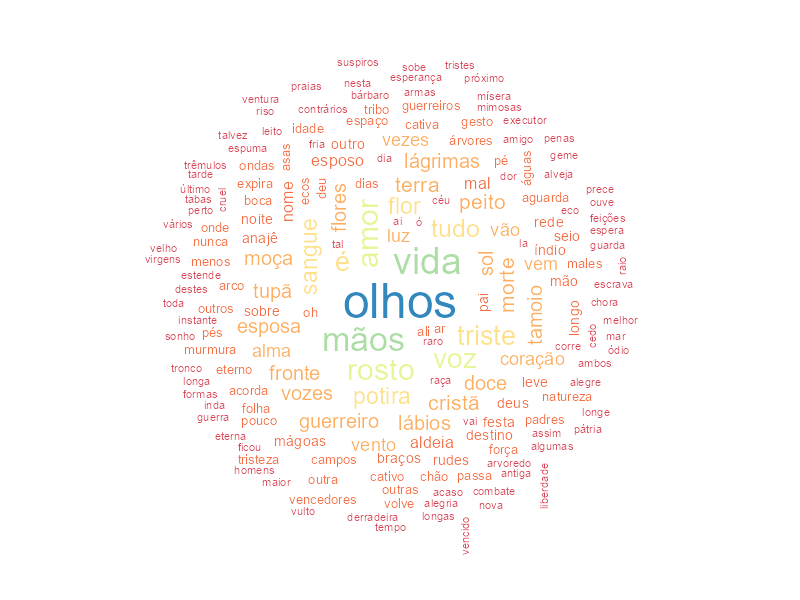

In [12]:
# converte vetor para data.frame
tokens.nuvem.df <- as.data.frame(table(tokens.nuvem))
# remove margins para comportar a nuvem
par(mar=c(0,0,0,0))
# gera nuvem
wordcloud(tokens.nuvem.df$tokens.nuvem, tokens.nuvem.df$Freq, colors=brewer.pal(8, "Spectral"),random.order=FALSE)

Podemos observar que a palavra de frequência mais alta é "olhos", seguida por "vida" e "mãos", depois por "rosto", "voz" e "amor". As cores agrupam os termos com a mesma ocorrência, relevando aspectos *quantitativos* da estrutura do texto. 

Se o resultado ainda não for satisfatório, podemos utilizar listas personalizadas de palavras de parada, refinadas de acordo com o nosso interesse. 

In [13]:
# cria vetor com palavras que desejamos remover
palavras.de.parada <- c('é','la','tal','oh','aí','ai','ali','ó')
# lista de termos para remover
remover <- which(tokens.nuvem %in% palavras.de.parada)
# remove
tokens.nuvem <- tokens.nuvem[-remover]
# distribuição resultante
print(paste("Total de tokens:",length(tokens.nuvem),"/ total de tokens únicos:",length(unique(tokens.nuvem))))

[1] "Total de tokens: 2477 / total de tokens únicos: 1565"


E geramos novamente o `data.frame` e o gráfico com as palavras de parada removidas:

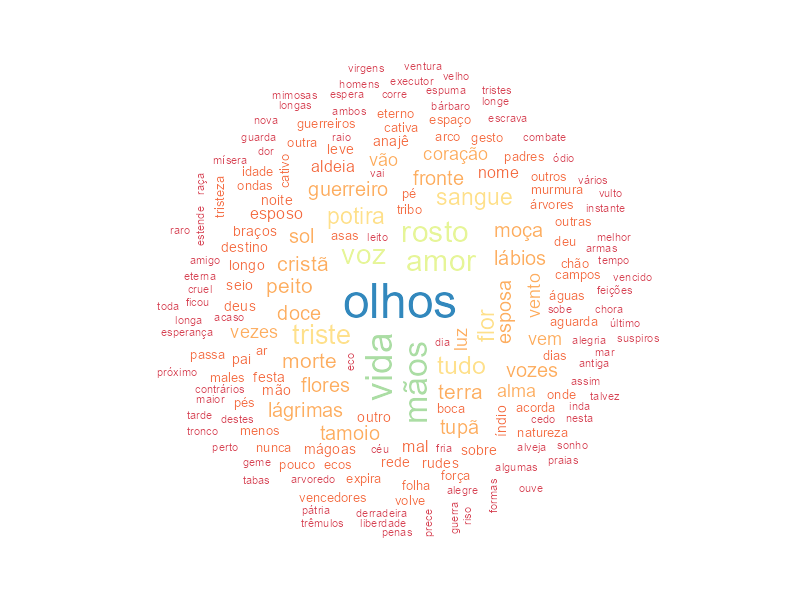

In [14]:
# converte vetor para data.frame (novamente)
tokens.nuvem.df <- as.data.frame(table(tokens.nuvem))
# remove margins para comportar a nuvem
par(mar=c(0,0,0,0))
# gera nuvem
wordcloud(tokens.nuvem.df$tokens.nuvem, tokens.nuvem.df$Freq, colors=brewer.pal(8, "Spectral"),random.order=FALSE)

### Lematização e radicalização

A *lematização* transforma o *corpus* de modo que as variações das unidades linguísticas (*lexemas*) sejam substituídas representações canônicas (*lemas*), que não prejudicam o entendimento do texto. 

| Lexema | Lema | Raiz |
|--------|------|------|
|algum, alguns, alguma, algumas | algum | algu_ |

A *radicalização* identifica o morfema básico da unidade, de modo a remover as variações morfológicas. Este processo retorna *tokens* ainda mais simples, reduzindo-os às suas formas sem variação de gênero, número, classe gramatical, tempo verbal etc. 

O símbolo `_` (sublinhado) na tabela delimita o radical e sua aplicação ao corpus consistiria na substituição de todos os *lexemas* pela forma reduzida. Qualquer outro símbolo pode ser selecionado para tal indicação.

O processo de lematização e radicalização deve partir da inspeção do vocabulário tratado. O código a seguir exporta o data.frame `tokens.nuvem.df` para que esta avaliação seja feita no Microsoft Excel.

In [15]:
# carrega pacote openxlsx
library(openxlsx)
# exporta
write.xlsx(tokens.nuvem.df,"./dados/tokens-nuvem.xlsx")

Warning message:
package ‘openxlsx’ was built under R version 4.5.2 


Considerando o caso da raiz `algu_`, a inspeção da planilha gerada resultaria na seguinte situação:

:::: {.columns}
::: {.column width="50%"}

|token|frequência|
|--|:--:|
|alguma|1|
|algumas|2|
|alguns|1|
|**algu_**|**4**|

:::
::::

A substituição de *todas* ocorrências de `alguma`, `algumas` e `alguns` por `algu_` pode ser feita pelo próximo trecho de código. Note que retomamos o vetor original, com os dados brutos do poema, e reaplicamos *todas* as transformações anteriores.

> **Dica**: escolha bem o nome das variáveis em R, pois isso pode facilitar a reprodução de transformações e processamentos sequenciais dos dados. 

[1] "Ocorrências de algu_: 6"


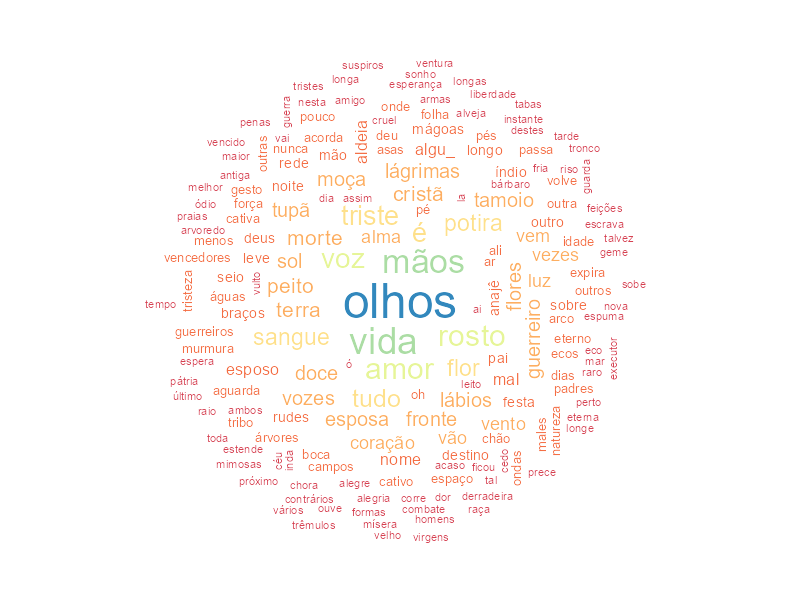

In [16]:
# converte o vetor original para minúsculas
tokens.minusculas <- str_to_lower(potira)
# substitui lexemas pelo radical algum*
tokens.minusculas <- str_replace_all(tokens.minusculas, "\\balgu[:alpha:]*","algu_")
# tokeniza vetor completo do poema
tokens.minusculas <- unlist(str_split(tokens.minusculas,boundary('word')))
# lista de termos para remover
remover <- which(tokens.minusculas %in% stopwords('pt'))
# remove
tokens.nuvem <- tokens.minusculas[-remover]
# converte vetor para data.frame (novamente)
tokens.nuvem.df <- as.data.frame(table(tokens.nuvem))
# informa a quantidade de ocorrências de algu_
print(paste("Ocorrências de algu_:",length(which(str_detect(tokens.nuvem,"algu_")))))
# remove margins para comportar a nuvem
par(mar=c(0,0,0,0))
# gera nuvem
wordcloud(tokens.nuvem.df$tokens.nuvem, tokens.nuvem.df$Freq, colors=brewer.pal(8, "Spectral"),random.order=FALSE)

## 2.2 Sintaxe

O nível mais simples de ordenação das unidades linguísticas envolve o respeito à sequência de *tokens* nas frases. A análise estritamente morfológica é baseada na técnica *Bag of Words*, que trata *tokens* de modo indiferenciado, sem considerar seus contextos de aparição e as possíveis relações com demais *tokens*.

### Explorando n-grams

Para evoluir a análise, podemos tanto definir *n-grams*, que são composições de *n* unidades de interesse, como se fossem expressões que aparecem no vocabulário.

> **Dica**: a análise morfológica oferece pistas de possíveis combinações de unidades em expressões.

Vamos verificar os contextos das palavras `olhos` (*f*=24):

* `str_detect()` recebe o documento em que ocorrerá a busca e o padrão de busca;
* O padrão de busca `\\bpotira\\b` significa que buscamos a palavra *olhos*, o que requer encapsulá-la entre os marcadores `\\b`; 
* O resultado de `str_detect()` é um vetor do tamanho de `potira`, indicando `TRUE` onde o padrão foi encontrado e `FALSE` onde não foi; 
* `which()` transforma o vetor de `TRUE` e `FALSE` nos índices de `potira`, permitindo que o vetor `doc.olhos` seja criado com as ocorrências. 


In [17]:
# localiza 'olhos' nos documentos
doc.olhos <- potira[which(str_detect(potira,"\\bolhos\\b"))]
# imprime resultado
print(doc.olhos)

 [1] "Quando a aldeia surgiu aos olhos torvos"       
 [2] "Nas veias ferve do índio. Os olhos luzem"      
 [3] "Da cativa gentil cerrados olhos"               
 [4] "Potira acorda, os olhos lança em torno,"       
 [5] "Do terrível tamoio os lindos olhos,"           
 [6] "Disse, e fitando no índio ávidos olhos,"       
 [7] "Crava os olhos no chão; lentas lhe saem"       
 [8] "Lágrimas lhe espremeu dos olhos negros"        
 [9] "Expirou de teu pai nos olhos tristes;"         
[10] "Enquanto a vida alumiar meus olhos."           
[11] "Da sua aldeia aos olhos espantados"            
[12] "A graciosa fronte; os olhos fecha,"            
[13] "Se, alguma vez, fugindo a estranhos olhos,"    
[14] "De seus olhos azuis e alegres penas"           
[15] "— “Pois que à taba voltaste, em que teus olhos"
[16] "Que há de acender nestes cansados olhos"       
[17] "Não expirar aos olhos de outros homens;"       
[18] "De olhos que amor venceu: — macia relva,"      
[19] "Anajê crava nela os ol

A partir do novo vetor, podemos buscar ocorrências de `olhos` como antecedente ou consequente do bigram. Por exemplo:

~~~
 [1] "olhos torvos" 
 [2] "cerrados olhos"
 [8] "olhos negros"
[19] "olhos turvos"
~~~

Podemos refazer a limpeza do vetor, excluindo pontuação e palavras de parada, de modo a deixar apenas termos que contribuam para o significado de `olhos` no contexto.

In [18]:
# remove pontuação
doc.olhos <- str_replace_all(doc.olhos,"[:punct:]","")
# transforma em caixa baixa
doc.olhos <- str_to_lower(doc.olhos)
# remove palavras de parada
# obs: concatenamos stopwords com o símbolo de ou (|) e identificadores de palavra (\\b)
doc.olhos <- str_replace_all(doc.olhos,
  str_c(
    str_c("\\b",stopwords("pt"),"\\b"),
    collapse="|"),
    "")
# remove palavras de parada personalizadas
palavras.de.parada.olhos <- c("os","dos","de")
# lista de termos para remover
doc.olhos <- str_replace_all(doc.olhos,str_c("\\b",palavras.de.parada.olhos,"\\b",collapse="|"),"")
# remove espaços duplos
doc.olhos <- str_replace_all(doc.olhos,"\\s+"," ")
# remove espaços no começo
doc.olhos <- str_trim(doc.olhos,side="both")
# imprime resultado
print(doc.olhos)

 [1] "aldeia surgiu olhos torvos"         "veias ferve índio olhos luzem"     
 [3] "cativa gentil cerrados olhos"       "potira acorda olhos lança torno"   
 [5] "terrível tamoio lindos olhos"       "disse fitando índio ávidos olhos"  
 [7] "crava olhos chão lentas saem"       "lágrimas espremeu olhos negros"    
 [9] "expirou pai olhos tristes"          "enquanto vida alumiar olhos"       
[11] "aldeia olhos espantados"            "graciosa fronte olhos fecha"       
[13] "alguma vez fugindo estranhos olhos" "olhos azuis alegres penas"         
[15] "pois taba voltaste olhos"           "acender nestes cansados olhos"     
[17] "expirar olhos outros homens"        "olhos amor venceu macia relva"     
[19] "anajê crava nela olhos turvos"      "olhos desmaio tristeza"            
[21] "desvalia olhos coube"               "turvos olhos perdôote murmura"     


### Ampliando a janela

A expressão regular para extrair a palavra `olhos` acompanhada de uma (01) palavra *antes* ou *depois* combina trechos utilizados anteriormente ao operador `|`, que significa "ou":

In [19]:
# extrai x+olhos e olhos+x
doc.olhos <- unlist(str_extract_all(doc.olhos,"\\b[:alpha:]+\\b\\s\\bolhos\\b|\\bolhos\\b\\s\\b[:alpha:]+\\b"))
print(doc.olhos)

 [1] "surgiu olhos"    "índio olhos"     "cerrados olhos"  "acorda olhos"   
 [5] "lindos olhos"    "ávidos olhos"    "crava olhos"     "espremeu olhos" 
 [9] "pai olhos"       "alumiar olhos"   "aldeia olhos"    "fronte olhos"   
[13] "estranhos olhos" "olhos azuis"     "voltaste olhos"  "cansados olhos" 
[17] "expirar olhos"   "olhos amor"      "nela olhos"      "olhos desmaio"  
[21] "desvalia olhos"  "turvos olhos"   


Eventualmente, podemos avaliar que uma palavra adicional é insuficiente para avaliar o contexto de ocorrência de *tokens* de interesse. Podemos selecionar, por exemplo, uma *janela* mais ampla e incluir uma palavra *antes* e outra *após* aquela sob investigação.

O código a seguir refaz o percurso inteiro com este objetivo, gerando o vetor `doc.olhos.tri` *com* e *sem* palavras de parada para comparação:

In [20]:
# ---------------------------------
# 1) com palavras de parada
# ---------------------------------
# localiza 'olhos' nos documentos
doc.olhos.tri <- potira[which(str_detect(potira,"\\bolhos\\b"))]
# remove pontuação
doc.olhos.tri <- str_replace_all(doc.olhos.tri,"[:punct:]","")
# transforma em caixa baixa
doc.olhos.tri <- str_to_lower(doc.olhos.tri)
# extrai janela x+olhos+y
doc.olhos.tri <- unlist(str_extract_all(doc.olhos.tri,"\\b[:alpha:]+\\b\\s\\bolhos\\b\\s\\b[:alpha:]+\\b"))
print(doc.olhos.tri)


 [1] "aos olhos torvos"      "os olhos luzem"        "os olhos lança"       
 [4] "os olhos no"           "dos olhos negros"      "nos olhos tristes"    
 [7] "aos olhos espantados"  "os olhos fecha"        "seus olhos azuis"     
[10] "aos olhos de"          "de olhos que"          "os olhos turvos"      
[13] "os olhos foi"          "aos olhos teus"        "turvos olhos perdôote"


In [21]:
# ---------------------------------
# 2) sem palavras de parada
# ---------------------------------
# localiza 'olhos' nos documentos
doc.olhos.tri.sem <- potira[which(str_detect(potira,"\\bolhos\\b"))]
# remove pontuação
doc.olhos.tri.sem <- str_replace_all(doc.olhos.tri.sem,"[:punct:]","")
# transforma em caixa baixa
doc.olhos.tri.sem <- str_to_lower(doc.olhos.tri.sem)
doc.olhos.tri.sem <- str_replace_all(doc.olhos.tri.sem,
  str_c(
    str_c("\\b",stopwords("pt"),"\\b"),
    collapse="|"),
    "")
# remove palavras de parada personalizadas
palavras.de.parada.olhos <- c("os","dos","de")
# lista de termos para remover
doc.olhos.tri.sem <- str_replace_all(doc.olhos.tri.sem,str_c("\\b",palavras.de.parada.olhos,"\\b",collapse="|"),"")
# remove espaços duplos
doc.olhos.tri.sem <- str_replace_all(doc.olhos.tri.sem,"\\s+"," ")
# remove espaços no começo
doc.olhos.tri.sem <- str_trim(doc.olhos.tri.sem,side="both")
# extrai janela x+olhos+y
doc.olhos.tri.sem <- unlist(str_extract_all(doc.olhos.tri.sem,"\\b[:alpha:]+\\b\\s\\bolhos\\b\\s\\b[:alpha:]+\\b"))
print(doc.olhos.tri.sem)

 [1] "surgiu olhos torvos"     "índio olhos luzem"      
 [3] "acorda olhos lança"      "crava olhos chão"       
 [5] "espremeu olhos negros"   "pai olhos tristes"      
 [7] "aldeia olhos espantados" "fronte olhos fecha"     
 [9] "expirar olhos outros"    "nela olhos turvos"      
[11] "desvalia olhos coube"    "turvos olhos perdôote"  


A inspeção da distribuição completa de frequências pode ajudar a identificar termos e sentenças que merecem investigação. No entanto, a revisão da literatura sobre o objeto de pesquisa e os resultados dos estudos anteriores podem sugerir palavras a serem exploradas.

> **Dica**: Alguns temos parecem ser palavras de parada, mas podem ser modificadores de outras palavras efetivamente importantes, o que nos leva à composição de *n-grams* no vocabulário. Por exemplo, *não* transforma o contexto de ocorrência de termos como *posso*, *devo* , *consigo* e *faço*.


## 2.3 Semântica

De que modo a frequência de *tokens* nos documentos pode fornecer indícios sobre os temas de que tratam o conjunto de dados? Como vimos, a contagem de frequência de lexemas em *sacos de palavras* não permite considerar a sintaxe das sentenças, tampouco as relações entre *tokens* utilizados nos registros textuais.

### A frequência relativa da palavra: *tf*

Em vez de realizar a contagem absoluta, o quociente entre a frequência de ocorrência total do termo no documento ($f_{t,d}$) e o total de termos que o documento emprega ($\Sigma_{t'\in d}$).

$$
tf(t,d)=\frac{f_{t,d}}{\Sigma_{t'\in d}}
$$ {#eq-tf}

Para exemplificar a computação desta medida, trataremos toda a coleção dos textos de Machado de Assis entre 1870 e 1879. Avaliaremos as medidas de cada termo do vocabulário completo da coleção, aplicando o processo pela normalização e limpeza dos poemas apresentado anteriormente.

In [22]:
# ajusta exibição de casas decimais
options(scipen=9999)

# importa coleção de Machado de Assis
colecao <- read.xlsx("1870-1879.xlsx")

# --------------------------------
# limpeza e normalização dos dados
# --------------------------------
# remove pontuação
colecao$texto <- str_replace_all(colecao$texto,"[:punct:]"," ")
# remove quebras de linha
colecao$texto <- str_replace_all(colecao$texto,"\\n"," ")
# transforma para minúsculas
colecao$texto <- str_to_lower(colecao$texto)
# remove palavras de parada
colecao$texto <- str_replace_all(colecao$texto,str_c("\\b",stopwords('pt'),"\\b",collapse="|")," ")
# remove espaços duplicados
colecao$texto <- str_replace_all(colecao$texto,"\\s{1,}"," ")
# remove espaços extras no início e final
colecao$texto <- str_trim(colecao$texto,side="both")

O `data.frame` normalizado pode então ser transformado no vocabulário:

In [23]:
# tokeniza vetor completo 
colecao.tokens <- unique(unlist(str_split(colecao$texto,boundary('word'))))
# informa a quantidade de tokens
print(paste("Total de tokens:",length(colecao.tokens)))

[1] "Total de tokens: 14362"


O denominador da equação 1 corresponde aos **14.362** *tokens* únicos da coleção. Precisaremos calcular a frequência de cada termo em cada documento para completar os dados necessários para o cálculo da medida *tf*. Os resultados serão registrados no `data.frame` de nome `txd` (*tokens* x documentos). 

A primeira coluna de `txd` registra o total de *tokens* no documento, para facilitar computações subsequentes. As colunas seguintes correspondem a todos os termos do vocabulário.

In [24]:
# cria data.frame de tokens x documentos
txd <- as.data.frame(
  matrix(
    data=0,
    nrow=nrow(colecao),
    ncol=length(colecao.tokens)+1 # total tokens do documento + frequência token/documento
  )
)
# define nomes das colunas
colnames(txd) <- c("total.tokens",colecao.tokens)
# define nomes das linhas
rownames(txd) <- paste0(
  "doc", # prefixo
  seq(1, # valor inicial
    nrow(colecao), # valor final
    1    # incremento
  )
)

A matrix `txd` é do tipo *esparsa*, uma vez que terá muitas células com valor zero, referentes aos documentos em que um dado termo não ocorre. A partir dela, criaremos a matriz `txd.tf`, que registrará a frequência relativa de cada *token*.

> **Dica**: podemos aproveitar a estrutura de `txd.tf` para a matriz `txd.tfidf` que será explicada na próxima seção. A estrutura é exatamente a mesma, mas os valores armazenados são diferentes.

In [25]:
# cria data.frame para as medidas tf tokens x documentos
# (primeira coluna com totais é desnecessária)
txd.tf <- txd[,c(2:ncol(txd))]

# aproveita estrutura para tf-idf
txd.tfidf <- txd.tf

O trecho de código abaixo é responsável por contar as ocorrências de cada *token* por documento. Este processo tem quatro etapas principais:

* Linha 4: atribuímos a `doc.tokens` a contagem total de *tokens* em `documento` a partir da tokenização realizada pela função `str_split()`
* Linhas 10 a 17: `freq.token` registra a frequência de `token` em `documento` utilizando a função `str_match_all()`
* Linha 19: registramos `freq.token` em `txd`
* Linha 21: calculamos a frequência ponderada (*tf*) propriamente dita

> **Dica**: o *script* a seguir é intensivo em processamento e *não está otimizado*, podendo demorar cerca de *5 minutos* para ser concluído. Para evitar o tempo de espera, exporte a planilha resultante e a importe antes dos processamentos seguintes.


In [26]:
# contagem das frequências
for (documento in 1:nrow(colecao)) {
  # total de tokens do documento
  doc.tokens <- length(unlist(str_split(colecao$texto[documento],boundary('word'))))
  # inclui na matriz
  txd$total.tokens[documento] <- doc.tokens
  # conta ocorrências de cada token no documento
  for (token in colecao.tokens) {
    # computa
    freq.token <- length(
      unlist(
        str_match_all(
          colecao$texto[documento],
          str_c("\\b",token,"\\b")
        )
      )
    )
    # adiciona à df geral
    txd[documento,token] <- freq.token
    # computa tf
    txd.tf[documento,token] <- freq.token/doc.tokens
  }
}
# Visualiza txd
View(txd)


### A informação transmitida pela palavra quanto à coleção: *idf*

Ao considerarmos a coleção completa de documentos, podemos avaliar o quão *rara* ou *comum* uma palavra é. 

O *inverso da frequência nos documentos* ou *inverse document frequency (idf)* é uma medida quantitativa da frequência $N$ do termo $t$ na coleção de documentos $D$, definida pelo logaritmo do quociente entre o total de documentos e o número de documentos que contêm o termo:

$$
idf(t,D) = log\frac{N}{n_t}
$$ {#eq-idf}

Assumindo que o termo está presente na coleção, o denominador ${n_t}$ será diferente de zero. Criaremos uma nova matriz, denominada `txd.idf` para registrar os os resultados da equação 2. 

> **Dica**: o valor de *idf* é constante para cada termo na coleção de documentos, de modo que a matriz só terá *uma única* linha.

In [27]:
# cria data.frame para as medidas idf dos tokens
txd.idf <- as.data.frame(matrix(nrow=1,ncol=length(colecao.tokens),data=0))
colnames(txd.idf) <- colecao.tokens

O cálculo de *idf* para os termos analisa quantas células das respectivas colunas têm valor maior que zero e atribui o resultado a `nt` (numerador da equação 2). Em seguida, computamos o logarítmo do quociente entre o número de documentos da coleção, obtido por `nrow()` e `nt`.

In [28]:
# laço por documentos e termos
for (coluna in colecao.tokens) {
  # conta ocorrências em todos os documentos
  nt <- length(which(txd[,coluna] > 0))
  # calcula idf (somando 1 para evitar divisão por zero)
  idf <- log10(nrow(colecao)/nt)
  # adiciona ao df
  txd.idf[1,coluna] <- idf
}
# Visualiza
View(txd.idf)

### A medida da importância do termo: *tf-idf*

Finalmente, a medida *tf-idf* se refere à importância de *tokens* ($t$) em documentos ($d$) de uma coleção ($D$) a partir do produto entre a frequência do termo no documento quem estão ($tf$) e a frequência dele no conjunto de documentos ($idf$).

$$
tfidf(t,d,D)=tf(t,d) \cdot idf(t,D)
$$ {#eq-tfidf}

A equação 3 produz números grandes se a frequência do termo no documento for alta e a frequência dele na coleção for baixa. Pode-se entender tal relação como a capacidade do termo ser um bom indicador para um documento específico, em vez de estar disperso pela coleção. 

A matriz esparsa `txd.tfidf` registra o resultado da multiplicação por documento e termo. 

> **Aviso!** Trecho de código com execução demorada (*3 minutos ou mais*)!

In [29]:
# calcula tf-idf por documento
for (documento in 1:nrow(colecao)) {
  # calcula tf-idf do token no documento
  for (coluna in colecao.tokens) {
    # tf-idf: idf(termo) * tf(documento,termo)
    txd.tfidf[documento,coluna] <- txd.idf[1,coluna] * txd.tf[documento,coluna]
  }
}

O formato "tidy" para `data.frames` facilita a construção de visualizações pois reduz a quantidade de variáveis. Em vez de mantermos a matriz esparsa, transformamos cada termo no nível de uma coluna *token*, indicando o documento que ocorre e o valor *tf-idf* correspondente.

In [30]:
# cria novo df no formato tidy
txd.tidy <- data.frame()

# linhas
for (linha in 1:nrow(txd.tfidf)) {
  # documento
  documento <- rownames(txd.tfidf)[linha]
  # colunas
  for (coluna in 1:ncol(txd.tfidf)) {
    # token
    token <- colnames(txd.tfidf)[coluna]
    # tf-idf
    tfidf <- txd.tfidf[linha,coluna]
    # adiciona ao df se > 0
    if (tfidf > 0) {
      txd.tidy <- rbind(txd.tidy, 
        data.frame(
          "doc"=documento,
          "token"=token,
          "tf.idf"=tfidf
        )
      )
    }
  }
}

Ademais, é interessante gerar o *ranking* dos termos, isto é, ordená-los de acordo com o valor de *tf-idf* por documento. Isto facilita a visualização dos $n$ termos mais relevantes para um documento ou para toda a coleção.

![Visualização da coluna `tf.idf` para a criação de *rankings*. ](./imagens/ranking.png)

In [31]:
# cria ranking dos tokens
txd.tidy$ranking <- NA

# ordena com base em tf e token por documento
for (d in 1:nrow(txd.tidy)) {
  # documento
  doc <- txd.tidy$doc[d]
  token.rankings <- order(txd.tidy[txd.tidy$doc==doc,]$tf.idf, decreasing = TRUE)
  # adiciona ordem ao data.frame
  txd.tidy[txd.tidy$doc==doc,]$ranking[token.rankings] <- 1:nrow(txd.tidy[txd.tidy$doc==doc,])
}


O pacote `ggplot2` reúne funções para a geração de gráficos com base no formato *tidy*. A figura tem 23 painéis que correspondem a cada documento da coleção e a distribuição da medida *tf-idf*. 

In [32]:
# instala pacote
install.packages('ggplot2')
# carrega pacote
library(ggplot2)

Installing package into ‘C:/Users/msn/AppData/Local/R/win-library/4.5’
(as ‘lib’ is unspecified)


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/ggplot2_4.0.1.zip'
Content type 'application/zip' length 8479127 bytes (8.1 MB)
downloaded 8.1 MB



package ‘ggplot2’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\msn\AppData\Local\Temp\RtmpqKMgF1\downloaded_packages


Warning message:
package ‘ggplot2’ was built under R version 4.5.2 


As seguintes funções geram o gráfico:

* `ggplot()` inicializa o gráfico, recebendo `txd.tidy` como argumento. Isso expõe as variáveis do `data.frame` para a construção do gráfico;
* `geom_jitter()` marca pontos no gráfico, tendo o *ranking* do termo no eixo $X$ e *tf-idf* no eixo $Y$;
* `scale_x_log10()` e `scale_y_log10()` definem a escala dos eixos para logarítmica de base 10;
* `xlab()` e `ylab()` mudam os rótulos dos eixos e `labs()` define o título e subtítulo do gráfico;
* `facet_wrap()` cria os painéis do gráfico, controlando pelos documentos (fórmula `~doc`);
* `theme_minimal()` seleciona o tema "minimal", que é mais limpo e usa menos elementos gráficos.




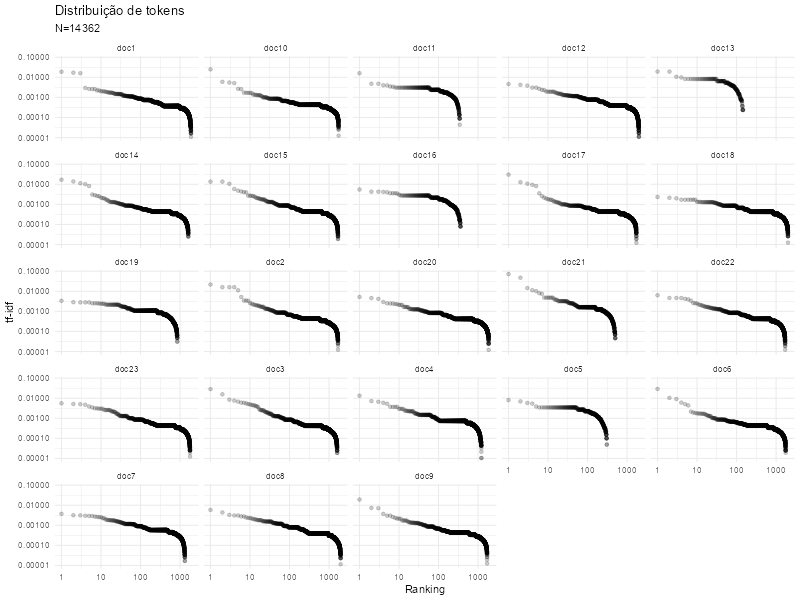

In [33]:
# plota ranking x tf-idf por documento
ggplot(txd.tidy) + 
  geom_jitter(aes(x=ranking,y=tf.idf),alpha=0.2)+
  scale_x_log10()+
  scale_y_log10()+
  xlab("Ranking")+
  ylab("tf-idf")+
  labs(title="Distribuição de tokens",subtitle=paste0("N=",length(colecao.tokens)))+
  facet_wrap(~doc,ncol=5)+
  theme_minimal()

O conjunto dos painéis aproxima a distribuição proposta pela [Lei de Zipf](https://en.wikipedia.org/wiki/Zipf%27s_law): a frequência de um termo é inversamente proporcional à sua ordem (*ranking*) no corpus. Os termos mais à esquerda do gráfico têm ordem baixa e *tf-idf* alto.

O gráfico da coleção completa oferece outra perspectiva sobre o efeito, acompanhado da reta de regressão em que tentamos predizer o *ranking* a partir da medida *tf-idf*.


Call:
lm(formula = log(ranking) ~ log(tf.idf), data = txd.tidy)

Coefficients:
(Intercept)  log(tf.idf)  
     -3.004       -1.167  



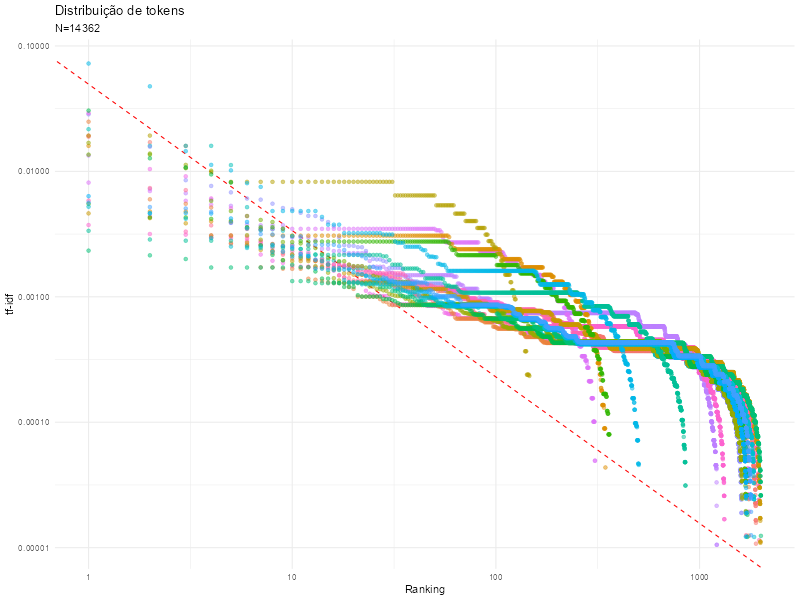

In [34]:
# calcula regressão
print(lm(log(ranking) ~ log(tf.idf), data=txd.tidy))

# plota ranking x tf-idf por documento
ggplot(txd.tidy) + 
  geom_abline(slope=-1.167,intercept = -1.305, colour="red", linetype=2)+
  geom_jitter(aes(x=ranking,y=tf.idf,colour=doc),alpha=0.5)+
  scale_x_log10()+
  scale_y_log10()+
  xlab("Ranking")+
  ylab("tf-idf")+
  labs(title="Distribuição de tokens",subtitle=paste0("N=",length(colecao.tokens)))+
  theme_minimal() + 
  theme(legend.position="none")

Finalmente, a nuvem de palavras da coleção completa,baseada na medida *tf-idf*, sugere termos que parecem relevantes para entender todos os textos: "tomé", "elisa", "garcia", "félix", "estevão" e "mendonça" são nomes de personagens importantes para cada história. 

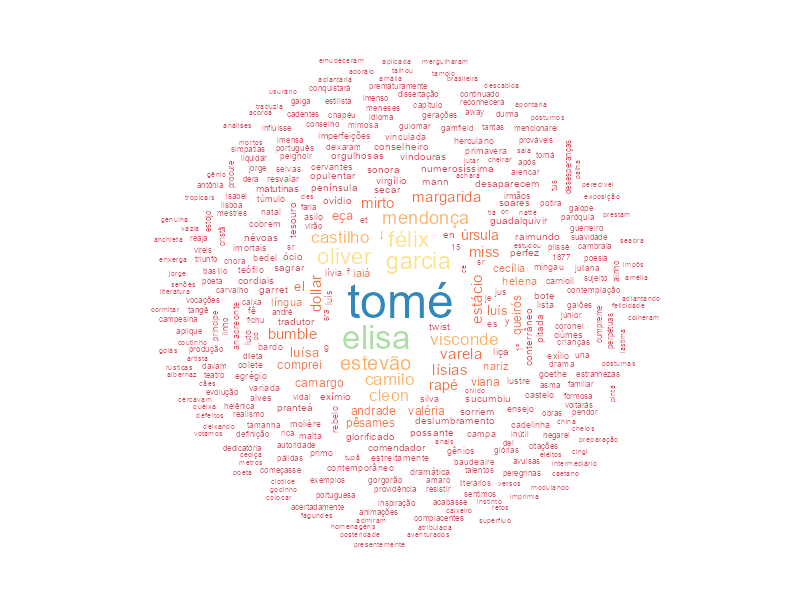

In [35]:
# remove margins para comportar a nuvem
par(mar=c(0,0,0,0))
# nuvem de palavras por tf-idf para toda a coleção
wordcloud(
  txd.tidy$token, 
  txd.tidy$tf.idf, 
  colors=brewer.pal(8, "Spectral"),
  random.order=FALSE, 
  min.freq = 0.003 # tf-idf mínimo (+/- 10º)
)

Já em relação a "Americanas", livro que inclui o poema "Potira", a nuvem *tf-idf* igualmente indica personagens, grupos ou entidades relevantes para as histórias. 

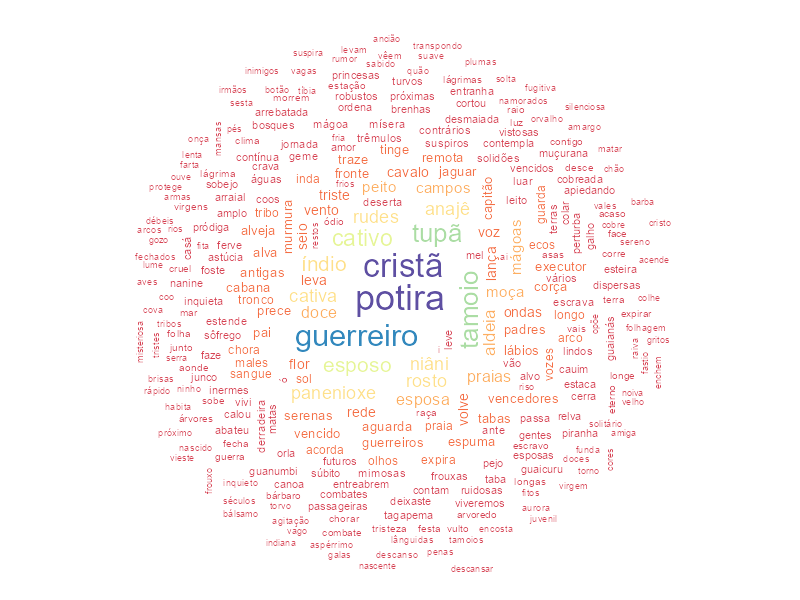

In [ ]:
# reparte matriz para documento 12 (Americanas)
txd.doc1 <- txd.tidy[txd.tidy$doc=="doc12",]
wordcloud(
  txd.doc1$token, 
  txd.doc1$tf.idf,
  c(3,.5), # intervalo do tamanho das palavras
  colors=brewer.pal(10, "Spectral"),
  random.order=FALSE, 
  min.freq = 0.0005 # tf-idf mínimo (+/- 100º)
)

Como última visualização, podemos gerar gráficos com os *tokens* de *tf-idf* mais altos em um dado documento:

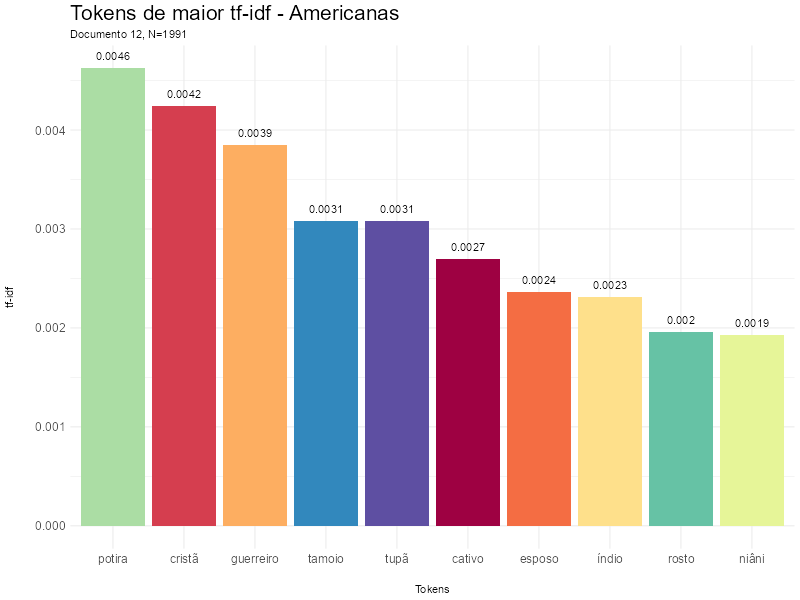

In [ ]:
# plota top-10 tokens por tf-idf do documento 1
ggplot(txd.tidy[txd.tidy$doc=="doc12" & txd.tidy$ranking <= 10,]) + 
  # barra com token no eixo X e tf-idf no eixo Y
  # ordenando de modo descrescente por tf-idf 
  geom_col(aes(x=reorder(token, -tf.idf),y=tf.idf,fill=token)) + 
  # imprime valor
  geom_text(
    aes(
      x=token,
      y=tf.idf,
      label=round(tf.idf,4),
      # ajusta para fora da barra
      vjust=-1
    )
  ) +
  # define eixos
  xlab("Tokens")+
  ylab("tf-idf")+
  # título do gráfico
  labs(
    # texto do título
    title="Tokens de maior tf-idf - Americanas", 
    # texto do subbtítulo indicando N
    subtitle=paste0(
      "Documento 12, N=",
      nrow(txd.tidy[txd.tidy$doc=="doc12",])
    )
  )+
  # cores das barras
  scale_fill_discrete(palette=brewer.pal(10, "Spectral"))+
  theme_minimal() + 
  # configurações do gráfico
  theme(
    # título do gráfico
    plot.title = element_text(size=21),
    # fonte e espaçamento do eixo x
    axis.text.x = element_text(size=12),
    axis.title.x = element_text(margin=margin(t=20,b=0,l=0,r=0,unit="pt")),
    # fonte e espaçamento do eixo x
    axis.text.y = element_text(size=12),
    axis.title.y = element_text(margin=margin(t=0,b=0,l=0,r=20,unit="pt")),
    # oculta legenda
    legend.position="none"
  )

Finalmente, devemos exportar todos os dados gerados para facilitar seu reuso em *notebooks* futuros.

In [ ]:
# exportação de todo o processo (remova # das linhas exportar)
#write.xlsx(txd,"./dados/txd.xlsx")
#write.xlsx(txd.tf,"./dados/txd-tf.xlsx")
#write.xlsx(txd.idf,"./dados/txd-idf.xlsx")
#write.xlsx(txd.tfidf,"./dados/txd-tfidf.xlsx")
#write.xlsx(txd.tidy,"./dados/txd-tidy.xlsx")

# Atividade

Selecione entre cinco (5) e dez (10) obras da base `1870-1879.xlsx` e realize as seguintes investigações:

1. Gere a nuvem de palavras de cada obra;
2. Calcule as métricas *tf*, *idf* e *tf-idf*;
3. Indique, a partir das métricas, quais *tokens* seriam mais importantes para cada obra.

> **Dica**: o notebook [aula-03-quanteda.ipynb](./aula-03-quanteda.html) exemplifica *todas* as operações necessárias para uma (1) obra, utilizando o pacote `quanteda`. Sua sintaxe é mais simples, embora menos explícita 😉. Em caso de dúvidas, consulte a [documentação](https://quanteda.io/reference/index.html).